# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/Online_Retail.csv).

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [2]:
LINK = r'https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/Online_Retail.csv'
online_rt = pd.read_csv(LINK, encoding='latin1')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [3]:
data_step4 = online_rt[['Country', 'Quantity']]
data_step4.head()

,Country,Quantity
0,United Kingdom,6
1,United Kingdom,6
2,United Kingdom,8
3,United Kingdom,6
4,United Kingdom,6


In [4]:
data_step4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Country   541909 non-null  object
 1   Quantity  541909 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.3+ MB


In [5]:
data_step4.isnull().sum()

Country     0
Quantity    0
dtype: int64

In [6]:
# Không có giá trị null nào trong hai cột trên
group = data_step4.groupby('Country').sum()

In [9]:
except_uk = group[group.index != 'United Kingdom'].sort_values('Quantity', ascending=False) #Lấy ra các nước khác UK
top10 = except_uk.head(10)

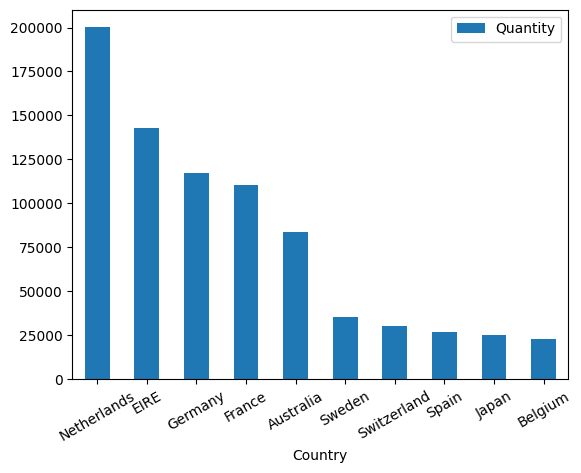

In [11]:
top10.plot(kind='bar', rot=30)
plt.show()

### Step 5.  Exclude negative Quantity entries

In [14]:
negative_bool = online_rt['Quantity'] < 0
negative = online_rt[negative_bool]
negative.shape

(10624, 8)

In [16]:
postive_quantity = online_rt[~negative_bool]
postive_quantity.shape

(531285, 8)

In [17]:
online_rt.shape

(541909, 8)

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

In [20]:
postive_quantity.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [22]:
except_UK = postive_quantity[postive_quantity['Country'] != 'United Kingdom']
except_UK.shape

(44999, 8)

In [23]:
except_UK.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1420
Country           0
dtype: int64

In [26]:
# Sau khi lấy ra các country không phải UK, chúng ta cần xem xét lại top 3 các nước có quantity cao nhất
group_positive = except_UK[['Country', 'Quantity']].groupby('Country').sum()
top10 = group_positive.sort_values('Quantity', ascending=False).head(10)

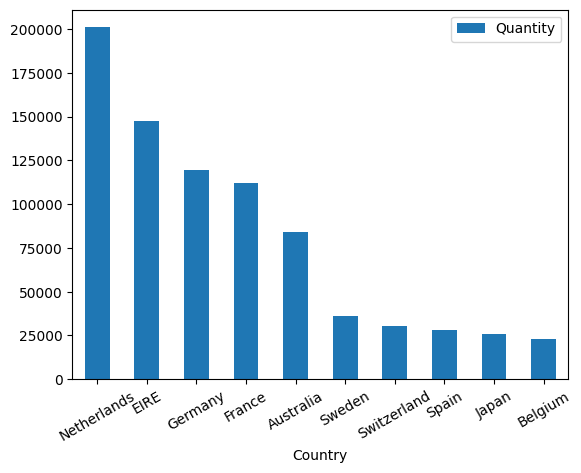

In [28]:
top10.plot(kind='bar', rot=30)
plt.show()

In [30]:
# Vậy 3 nước có Quantity cao nhất lần lượt là Netherlands, EIRE, Germany
top3_countries = ['Netherlands', 'EIRE', 'Germany']
data_step6 = except_UK[except_UK['Country'].isin(top3_countries)]

In [32]:
data_step6.shape

(19299, 8)

In [33]:
# check result
data_step6['Country'].unique()

array(['Netherlands', 'Germany', 'EIRE'], dtype=object)

In [34]:
data_step6.isnull().sum()

InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID     656
Country          0
dtype: int64

In [35]:
group_userid = data_step6.groupby('CustomerID')[['Quantity', 'UnitPrice']].sum()

In [39]:
group_userid.head()

,Quantity,UnitPrice
CustomerID,,
12426.0,258,118.09
12427.0,533,142.26
12468.0,366,133.57
12471.0,8212,1978.17
12472.0,4148,812.81


In [44]:
# Chúng ta có 3 biến, đầu tiên là CustomerID, sau đó trên hai trục lần lượt là Quantity và UnitPrice, do đúng dùng seaborn để trực quan
# Đầu tiên cần chuyển dạng của CustomerID
group_userid.index=group_userid.index.astype('int64')
group_userid

,Quantity,UnitPrice
CustomerID,,
12426,258,118.09
12427,533,142.26
12468,366,133.57
12471,8212,1978.17
12472,4148,812.81
...,...,...
14016,2125,635.88
14156,57885,5357.68
14335,379,144.24


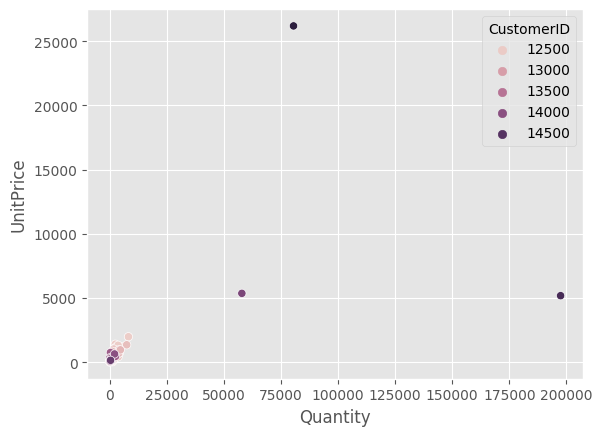

In [45]:
plt.style.use('ggplot')
sns.scatterplot(data=group_userid, x='Quantity', y='UnitPrice', hue=group_userid.index)
plt.show()

### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [48]:
'''
    Ta sẽ sử dụng postive_quantity (đã lọc quantity âm)
'''
postive_quantity.shape

(531285, 8)

In [49]:
postive_quantity.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

In [50]:
postive_quantity.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [52]:
'''
    Các UnitPrice không được âm nên ta cũng cần phải lọc ra các UnitPrice âm (nếu có)
'''
pos_quan_price = postive_quantity[postive_quantity['UnitPrice'] >= 0]
pos_quan_price.shape

(531283, 8)

In [53]:
pos_quan_price.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133359
Country             0
dtype: int64

In [54]:
pos_quan_price[pos_quan_price['Country'] != 'United Kingdom'].isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1420
Country           0
dtype: int64

In [55]:
'''
    Sau khi lọc các nước khác UK thì thấy rằng sô lương giám sát có giá trị NULL trong cột CustomerID giảm đi đáng kể.
'''

'\n    Sau khi lọc các nước khác UK thì thấy rằng sô lương giám sát có giá trị NULL trong cột CustomerID giảm đi đáng kể.\n'

##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [56]:
print(online_rt['UnitPrice'].dtype)

float64


##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [57]:
online_rt[online_rt['CustomerID'].isin([12346.0, 12347.0])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,12/7/11 15:52,0.85,12347.0,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,12/7/11 15:52,1.95,12347.0,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,12/7/11 15:52,0.83,12347.0,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,12/7/11 15:52,0.42,12347.0,Iceland


#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [58]:
sales_volume = online_rt.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

top3 = sales_volume.index[1:4]
top3

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [59]:
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

In [65]:
data_step7 = online_rt[['CustomerID', 'Country', 'Revenue', 'Quantity']]
top3_country = data_step7[data_step7['Country'].isin(top3)]
top3_country

,CustomerID,Country,Revenue,Quantity
385,12791.0,Netherlands,177.60,96
386,12791.0,Netherlands,15.00,1
1109,12662.0,Germany,17.70,6
1110,12662.0,Germany,15.30,6
1111,12662.0,Germany,10.20,12
...,...,...,...,...
541801,12713.0,Germany,15.00,12
541802,12713.0,Germany,10.20,12
541803,12713.0,Germany,10.20,12
541804,12713.0,Germany,24.96,12


In [73]:
group = top3_country.groupby(['CustomerID', 'Country']).sum()
group['AvgPrice'] = group['Revenue'] / group['Quantity']
group['Country'] = group.index.get_level_values(1)

group

,,Revenue,Quantity,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,582.73,258,2.258643,Germany
12427.0,Germany,708.37,236,3.001568,Germany
12468.0,Germany,724.04,364,1.989121,Germany
12471.0,Germany,18740.92,7965,2.352909,Germany
12472.0,Germany,6229.48,4020,1.549622,Germany
...,...,...,...,...,...
14016.0,EIRE,4328.46,2124,2.037881,EIRE
14156.0,EIRE,113384.14,57025,1.988323,EIRE
14335.0,Germany,468.26,379,1.235515,Germany


##### Step 7.3.3 Plot

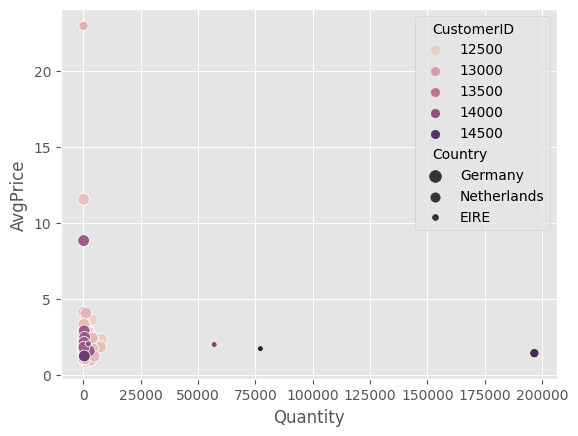

In [76]:
sns.scatterplot(data=group, x='Quantity', y='AvgPrice', hue=group.index.get_level_values(0), size='Country')
# Từ đây ta đã vẽ được scatter plot biểu diễn Quantity theo AvgPrice (Giá trung bình trên từng đơn vị)
plt.show()

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

In [82]:
group_id = online_rt.groupby('CustomerID')[['Quantity', 'Revenue']].sum()
group_id['AvgPrice'] = group_id['Revenue'] / group_id['Quantity']
group_id.head()

,Quantity,Revenue,AvgPrice
CustomerID,,,
12346.0,0,0.00,NaN
12347.0,2458,4310.00,1.753458
12348.0,2341,1797.24,0.767723
12349.0,631,1757.55,2.785341
12350.0,197,334.40,1.697462


[]

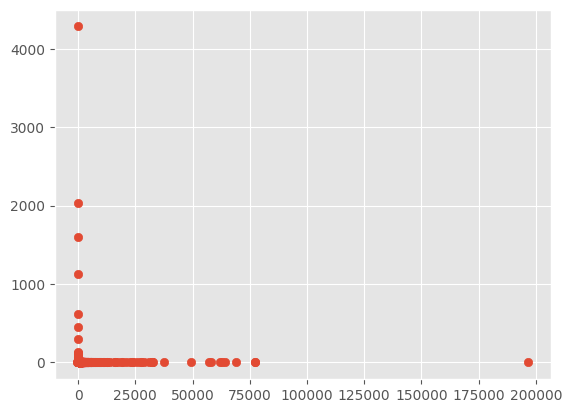

In [83]:
plt.scatter(group_id.Quantity, group_id.AvgPrice)
plt.plot()

##### Step 7.4.2 Zoom in so we can see that curve more clearly

[]

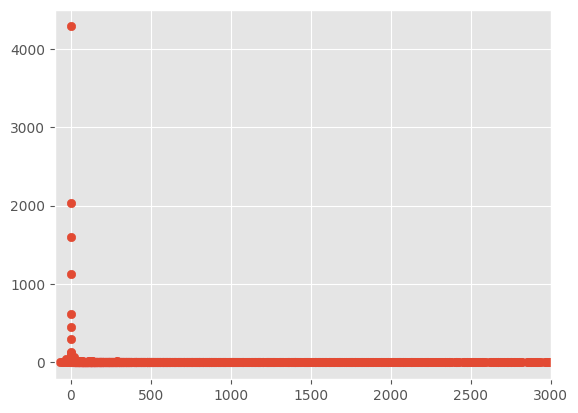

In [87]:
plt.scatter(group_id.Quantity, group_id.AvgPrice)
plt.xlim(-100, 3000)
plt.plot()

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

In [102]:
bins=range(0, 50, 1)
groupby_bins = online_rt.groupby(pd.cut(online_rt['UnitPrice'], bins).values)['Quantity', 'Revenue'].sum()
groupby_bins

<ipython-input-102-d621de7a9c10>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupby_bins = online_rt.groupby(pd.cut(online_rt['UnitPrice'], bins).values)['Quantity', 'Revenue'].sum()


,Quantity,Revenue
"(0, 1]",2079045,1089068.414
"(1, 2]",1728270,2557511.340
"(2, 3]",735633,1803381.940
"(3, 4]",239161,849919.340
"(4, 5]",265225,1199346.770
"(5, 6]",66010,378927.900
"(6, 7]",39094,260446.410
"(7, 8]",38708,296541.690
"(8, 9]",44290,372452.180
"(9, 10]",16053,157629.560


#### 8.3 Plot.

In [105]:
revenue = groupby_bins['Revenue']
revenue

(0, 1]      1089068.414
(1, 2]      2557511.340
(2, 3]      1803381.940
(3, 4]       849919.340
(4, 5]      1199346.770
(5, 6]       378927.900
(6, 7]       260446.410
(7, 8]       296541.690
(8, 9]       372452.180
(9, 10]      157629.560
(10, 11]     228268.850
(11, 12]      25016.080
(12, 13]     194984.920
(13, 14]      10533.640
(14, 15]      72145.950
(15, 16]      20932.070
(16, 17]      81971.500
(17, 18]      36016.630
(18, 19]        672.160
(19, 20]      17374.520
(20, 21]      20735.070
(21, 22]       2617.530
(22, 23]        -22.530
(23, 24]          0.260
(24, 25]      41909.540
(25, 26]      11980.290
(26, 27]         54.870
(27, 28]       8794.610
(28, 29]        -28.060
(29, 30]       7930.630
(30, 31]        -91.100
(31, 32]        -63.580
(32, 33]       2910.190
(33, 34]       5087.000
(34, 35]       8316.130
(35, 36]       2727.860
(36, 37]        145.290
(37, 38]         37.470
(38, 39]        -38.580
(39, 40]      19751.190
(40, 41]         40.460
(41, 42]        

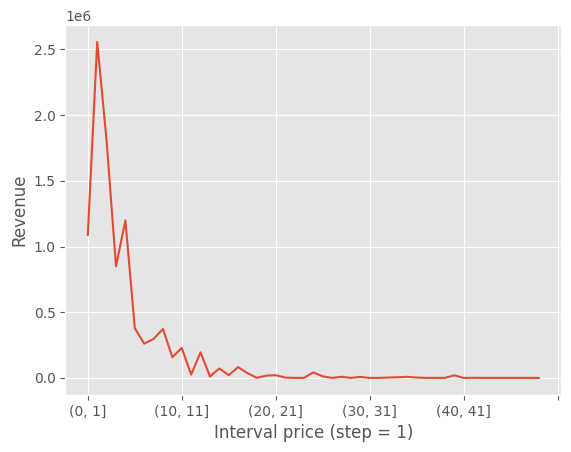

In [107]:
revenue.plot()
plt.ylabel('Revenue')
plt.xlabel('Interval price (step = 1)')
plt.show()

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

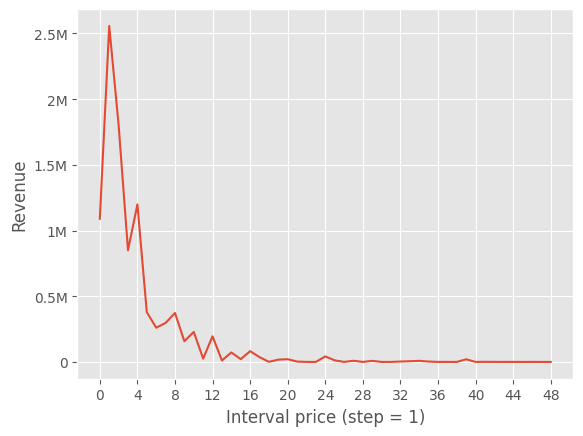

In [115]:
revenue_df = revenue/1e6
revenue_df.plot()

plt.yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5],
           ['0', '0.5M', '1M', '1.5M', '2M', '2.5M'])
plt.xticks(np.arange(0,50,4),
           np.arange(0,50,4))
plt.ylabel('Revenue')
plt.xlabel('Interval price (step = 1)')
plt.show()

### BONUS: Create your own question and answer it.

In [116]:
online_rt[online_rt['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
622,536414,22139,NaN,56,12/1/10 11:52,0.00,NaN,United Kingdom,0.00
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/10 14:32,2.51,NaN,United Kingdom,2.51
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/10 14:32,2.51,NaN,United Kingdom,5.02
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/10 14:32,0.85,NaN,United Kingdom,3.40
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/10 14:32,1.66,NaN,United Kingdom,3.32
...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/11 10:26,4.13,NaN,United Kingdom,20.65
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/11 10:26,4.13,NaN,United Kingdom,16.52
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/11 10:26,4.96,NaN,United Kingdom,4.96
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/11 10:26,10.79,NaN,United Kingdom,10.79


In [120]:
# Liệu chúng ta có thể drop hết các cột bị NaN không ??
online_rt['CustomerID'].isnull().sum() / online_rt.shape[0]
# Nếu drop đi thừ dữ liệu mất khoảng 25% theo dõi tương đương khoảng 135080 theo dõi, một con sô khá lớn, vậy liệu có giải pháp nào không
# Có lẽ cách duy nhất với trường hợp này là thêm dữ liệu vì tuy rằng có thể xử lý bằng cách fill các giá trị NaN bằng một số phương pháp như ffill(), bfill(), mean() nhưng nó chỉ mang tính định lượng 
# và khả năng cao là không phù hợp với tệp dữ liệu này

0.249266943342886